# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import gensim

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [5]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [6]:
#Check for NaN values

print('NaN in reviews column: ', df['Review'].isnull())
print('NaN values in positive review column: ', df['Positive Review'].isnull())

NaN in reviews column:  0       False
1       False
2       False
3       False
4       False
        ...  
1968    False
1969    False
1970    False
1971    False
1972    False
Name: Review, Length: 1973, dtype: bool
NaN values in positive review column:  0       False
1       False
2       False
3       False
4       False
        ...  
1968    False
1969    False
1970    False
1971    False
1972    False
Name: Positive Review, Length: 1973, dtype: bool


In [7]:
unique_in_positive_review = df['Positive Review'].unique()
unique_in_positive_review

value_counts = df['Positive Review'].value_counts()
value_counts

False    993
True     980
Name: Positive Review, dtype: int64

In [8]:
#To figure out the vocabulary size of the entire document collection
document_collection = df['Review'].tolist()

#vectorizer object
vectorizer = TfidfVectorizer()
vectorizer.fit(document_collection)

#get vocab size
print("Vocabulary size {0}: {1}\n".format(len(vectorizer.vocabulary_), vectorizer.vocabulary_))



Vocabulary size 21276: {'this': 19158, 'was': 20625, 'perhaps': 14062, 'the': 19065, 'best': 2195, 'of': 13271, 'johannes': 10517, 'steinhoff': 18151, 'books': 2491, 'since': 17396, 'it': 10382, 'does': 5832, 'not': 13071, 'deal': 4959, 'with': 20946, 'his': 9161, 'own': 13631, 'stellar': 18154, 'yet': 21180, 'tragic': 19446, 'ww': 21116, 'ii': 9540, 'and': 1099, 'post': 14576, 'war': 20593, 'career': 3069, 'insights': 10014, 'average': 1736, 'person': 14104, 'living': 11327, 'in': 9709, 'germany': 8253, 'are': 1363, 'great': 8559, 'importance': 9660, 'to': 19301, 'both': 2543, 'social': 17654, 'military': 12228, 'historians': 9165, 'alike': 918, 'offered': 13282, 'collective': 3801, 'testament': 19024, 'as': 1473, 'warning': 20608, 'all': 922, 'us': 20161, 'regarding': 15748, 'rise': 16317, 'dictator': 5450, 'said': 16593, 'an': 1067, 'interview': 10188, 'quot': 15339, 'is': 10344, 'always': 1005, 'civilians': 3563, 'who': 20838, 'suffer': 18482, 'most': 12548, 'remembered': 15891, 'l

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [9]:
y = df['Positive Review']
X = df['Review']

In [10]:
X.head

<bound method NDFrame.head of 0       This was perhaps the best of Johannes Steinhof...
1       This very fascinating book is a story written ...
2       The four tales in this collection are beautifu...
3       The book contained more profanity than I expec...
4       We have now entered a second time of deep conc...
                              ...                        
1968    I purchased the book with the intention of tea...
1969    There are so many design books, but the Graphi...
1970    I am thilled to see this book being available ...
1971    As many have stated before me the book starts ...
1972    I love this book! It is a terrific blend of ha...
Name: Review, Length: 1973, dtype: object>

In [11]:
y.head

<bound method NDFrame.head of 0        True
1        True
2        True
3       False
4        True
        ...  
1968     True
1969     True
1970     True
1971    False
1972     True
Name: Positive Review, Length: 1973, dtype: bool>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Section 1: Training two models using the TF-IDF vectorizer

In this section, I will train a logistic regression model and a decision tree model using the <b>TF-IDF</b> vectorizer method

In [13]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [14]:
print(X_test_tfidf)

  (0, 18965)	0.059491023406618646
  (0, 18727)	0.08752131471965732
  (0, 18642)	0.03533743581074492
  (0, 18593)	0.03466402255636781
  (0, 18539)	0.10400005525124341
  (0, 18496)	0.09274785194457173
  (0, 18455)	0.0276659188493222
  (0, 18126)	0.051656463721148134
  (0, 17733)	0.1213832032593689
  (0, 17680)	0.1213832032593689
  (0, 17618)	0.06952952155086067
  (0, 17302)	0.047594430972735094
  (0, 17259)	0.0725088662135299
  (0, 17226)	0.04030762713391491
  (0, 17133)	0.1295180018700078
  (0, 17117)	0.049162328805929446
  (0, 17104)	0.07672093808666652
  (0, 17066)	0.047152835152653096
  (0, 17061)	0.04603216704495873
  (0, 17053)	0.043249080127104864
  (0, 17044)	0.03390923842467748
  (0, 17040)	0.02324158038379852
  (0, 16805)	0.05557793152499216
  (0, 16288)	0.1104156579703061
  (0, 16266)	0.05275501870340633
  :	:
  (394, 16266)	0.11591490667341263
  (394, 16183)	0.16526647998794597
  (394, 14669)	0.21441548095429677
  (394, 11847)	0.041179983410956134
  (394, 11711)	0.11266334411

### Logistic Regression Model
I will first train a Logistic Regression model. I will use a grid search to find the best hyperparameters.

In [50]:
c_values = [0.01, 0.1, 1, 5, 10, 100, 1500, 5000, 50000]
max_iter_values = [100, 150, 200, 500, 1000, 3000]
param_grid = {
    'C': c_values,
    'max_iter': max_iter_values
}
param_grid

{'C': [0.01, 0.1, 1, 5, 10, 100, 1500, 5000, 50000],
 'max_iter': [100, 150, 200, 500, 1000, 3000]}

In [51]:
scaler = StandardScaler(with_mean=False)
X_train_scaled_tfidf = scaler.fit_transform(X_train_tfidf)

modelLR_tfidf = LogisticRegression()

gridLR_tfidf = GridSearchCV(modelLR_tfidf, param_grid, cv=5)

grid_searchLR_tfidf = gridLR_tfidf.fit(X_train_scaled_tfidf, y_train)

print('Done')

Done


In [52]:
best_c = grid_searchLR_tfidf.best_params_['C']
print('best C is', best_c)

best_max_iter = grid_searchLR_tfidf.best_params_['max_iter']
print('best max_iter is', best_max_iter)

best C is 0.1
best max_iter is 100


In [53]:
modelLR_best = LogisticRegression(max_iter=best_max_iter, C=best_c)

modelLR_best.fit(X_train_tfidf, y_train)

probability_predictionsLR_best = modelLR_best.predict_proba(X_test_tfidf)[:,1]
class_label_predictionsLR_best = modelLR_best.predict(X_test_tfidf)

aucLR_best = roc_auc_score(y_test, probability_predictionsLR_best)
accuracyLR_best = accuracy_score(y_test, class_label_predictionsLR_best)

print('AUC:', aucLR_best)
print('Accuracy:', accuracyLR_best)


AUC: 0.8927033124807712
Accuracy: 0.8227848101265823


### Decision Tree Model
Now, I will train a Decision Tree model. I will use a grid search to find the best hyperparameters.

In [54]:
param_grid = {
    'max_depth': [None, 1, 5, 10, 20, 30, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30]  
}
param_grid

{'max_depth': [None, 1, 5, 10, 20, 30, 50],
 'min_samples_leaf': [1, 5, 10, 20, 30]}

In [55]:
modelDT_tfidf = DecisionTreeClassifier(criterion='entropy')

gridDT_tfidf = GridSearchCV(modelDT_tfidf, param_grid, cv=5)

grid_searchDT_tfidf = gridDT_tfidf.fit(X_train_tfidf, y_train)

print('Done')

Done


In [56]:
best_max_depth = grid_searchDT_tfidf.best_params_['max_depth']
print('best max_depth is', best_max_depth)

best_min_samples_leaf = grid_searchDT_tfidf.best_params_['min_samples_leaf']
print('best min_samples_leaf is', best_min_samples_leaf)

best max_depth is 10
best min_samples_leaf is 20


In [57]:
modelDT_best_tfidf = DecisionTreeClassifier(criterion = 'entropy', max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf)
  
modelDT_best_tfidf.fit(X_train_tfidf, y_train)
    
probability_predictionsDT_tfidf = modelDT_best_tfidf.predict_proba(X_test_tfidf)[:,1]
class_label_predictionsDT_tfidf = modelDT_best_tfidf.predict(X_test_tfidf)

aucDT_tfidf = roc_auc_score(y_test, probability_predictionsDT_tfidf)
accuracyDT_tfidf = accuracy_score(y_test, class_label_predictionsDT_tfidf)

print('AUC:', aucDT_tfidf)
print('Accuracy:', accuracyDT_tfidf)


AUC: 0.7115808635011793
Accuracy: 0.6734177215189874


## Section 1: Training two models using word embeddings

In this section, I will train a logistic regression model and a decision tree model using the <b>word embeddings</b> method.

In [24]:
X_2 = X
X_2 = X_2.apply(lambda row: gensim.utils.simple_preprocess(row))

In [25]:
X_2.head()

0    [this, was, perhaps, the, best, of, johannes, ...
1    [this, very, fascinating, book, is, story, wri...
2    [the, four, tales, in, this, collection, are, ...
3    [the, book, contained, more, profanity, than, ...
4    [we, have, now, entered, second, time, of, dee...
Name: Review, dtype: object

In [26]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=1234)


In [27]:
print("Begin")
word2vec_model = gensim.models.Word2Vec(X_train_2,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

print("End")

Begin
End


In [28]:
word2vec_model.wv.similarity(w1='person', w2='human') #testing purposes

0.980851

In [29]:
word2vec_model.wv.similarity(w1='book', w2='person') #testing purposes

0.78981274

In [28]:
words = set(word2vec_model.wv.index_to_key)

print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train_2], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test_2], dtype=object)
print('Finish transforming X_test')


Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [60]:
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(100, dtype=float))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(100, dtype=float))

### Logistic Regression Model
Now, I will train a Logistic Regression model. I will use a grid search to find the best hyperparameters.

In [32]:
c_values = [0.01, 0.1, 1, 10, 100]
max_iter_values = [500, 1000, 3000, 5000]
param_grid = {
    'C': c_values,
    'max_iter': max_iter_values
}
param_grid

{'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [500, 1000, 3000, 5000]}

In [34]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_feature_vector)

modelLR_embeddings = LogisticRegression()
gridLR_embeddings = GridSearchCV(modelLR_embeddings, param_grid, cv=5)
grid_searchLR_embeddings = gridLR_embeddings.fit(X_train_feature_vector, y_train)

print('Done')

Done


In [35]:
best_c_embeddings = grid_searchLR_embeddings.best_params_['C']
print('best C is', best_c)

best_max_iter_embeddings = grid_searchLR_embeddings.best_params_['max_iter']
print('best max_iter is', best_max_iter)

best C is 0.1
best max_iter is 100


In [49]:
modelLR_best_embeddings = LogisticRegression(max_iter=best_max_iter_embeddings, C=best_c_embeddings)

modelLR_best_embeddings.fit(X_train_feature_vector, y_train)

probability_predictionsLR_best_embeddings = modelLR_best_embeddings.predict_proba(X_test_feature_vector)[:,1]
class_label_predictionsLR_best_embeddings = modelLR_best_embeddings.predict(X_test_feature_vector)

aucLR_best_embeddings = roc_auc_score(y_test, probability_predictionsLR_best_embeddings)
accuracyLR_best_embeddings = accuracy_score(y_test, class_label_predictionsLR_best_embeddings)

print('AUC:', aucLR_best_embeddings)
print('Accuracy:', accuracyLR_best_embeddings)

AUC: 0.7780484052917649
Accuracy: 0.7164556962025317


### Decision Tree Model
Finally, I will train a Decision Tree model. I will use a grid search to find the best hyperparameters.

In [40]:
param_grid = {
    'max_depth': [None, 1, 5, 10, 20, 30, 50],              # Explore different values for max_depth
    'min_samples_leaf': [1, 5, 10, 20, 30]  
}
param_grid

{'max_depth': [None, 1, 5, 10, 20, 30, 50],
 'min_samples_leaf': [1, 5, 10, 20, 30]}

In [41]:
modelDT_embeddings = DecisionTreeClassifier(criterion='entropy')

gridDT_embeddings = GridSearchCV(modelDT_embeddings, param_grid, cv=5)

grid_searchDT_embeddings = gridDT_embeddings.fit(X_train_tfidf, y_train)


In [45]:
best_max_depth_embeddings = grid_searchDT_embeddings.best_params_['max_depth']
print('best max_depth is', best_max_depth)

best_min_samples_leaf_embeddings = grid_searchDT_embeddings.best_params_['min_samples_leaf']
print('best min_samples_leaf is', best_min_samples_leaf)

best max_depth is 10
best min_samples_leaf is 20


In [46]:
modelDT_best_embeddings = DecisionTreeClassifier(criterion = 'entropy', max_depth = best_max_depth_embeddings, min_samples_leaf = best_min_samples_leaf_embeddings)
  
modelDT_best_embeddings.fit(X_train_feature_vector, y_train)
    
probability_predictionsDT_embeddings = modelDT_best_embeddings.predict_proba(X_test_feature_vector)[:,1]
class_label_predictionsDT_embeddings = modelDT_best_embeddings.predict(X_test_feature_vector)

aucDT_embeddings = roc_auc_score(y_test, probability_predictionsDT_embeddings)
accuracyDT_embeddings = accuracy_score(y_test, class_label_predictionsDT_embeddings)

print('AUC:', aucDT_embeddings)
print('Accuracy:', accuracyDT_embeddings)


AUC: 0.6362296174751307
Accuracy: 0.620253164556962


## Section 3: Results
Now that I have the 4 models, I will graph the results to easily compare the accuracy and the AUC of the 4 models.

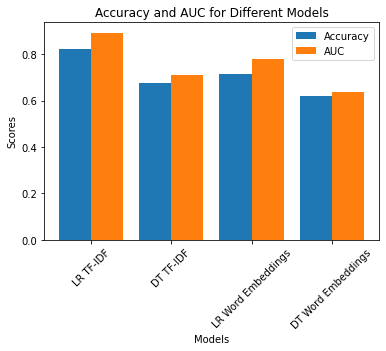

In [59]:
accuracy = [accuracyLR_best, accuracyDT_tfidf, accuracyLR_best_embeddings, accuracyDT_embeddings]
auc = [aucLR_best, aucDT_tfidf, aucLR_best_embeddings, aucDT_embeddings]
names = ['LR TF-IDF', 'DT TF-IDF', 'LR Word Embeddings', 'DT Word Embeddings']

x = range(len(names))

plt.bar(x, accuracy, width=0.4, label='Accuracy')
plt.bar([i + 0.4 for i in x], auc, width=0.4, label='AUC')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy and AUC for Different Models')
plt.xticks([i + 0.2 for i in x], names, rotation=45)
plt.legend()

plt.show()

Clearly, we can see that the best model is a logistic regression using TF-IDF, with overall an accuracy of around 0.8 and an AUC of around 0.9.